Cleaning and Combining Streaming History Data from JSOn to CSV

In [1]:
import pandas as pd
import os
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
#File locations
final_stream='.\\final_data\\StreamingHistory\\'
spotify_data='.\\spotify_data\\vijayasai\\'

In [3]:
#Importing JSON and converting them to CSV
data1=pd.read_json(os.path.join(spotify_data,'StreamingHistory0.json'))
data2=pd.read_json(os.path.join(spotify_data,'StreamingHistory1.json'))

#Combining both the JSON files to CSV
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)
combined_csv=pd.concat([data1,data2])
combined_csv.to_csv(os.path.join(final_stream,'Combined.csv'),index=False)

In [4]:
#Changing ms to s
data=pd.read_csv(os.path.join(final_stream,'Combined.csv'))
df=pd.DataFrame(data)
df.rename(columns={'msPlayed':'secondsPlayed'},inplace=True)
df['secondsPlayed']=df['secondsPlayed']/1000
df.to_csv(os.path.join(final_stream,'Combined.csv'),index=False)

Track Based Grouping Streaming History

In [5]:
#Get secondsPlayed History grouped by Track Name
track_seconds = (df.groupby('trackName').sum()).reset_index()[['trackName', 'secondsPlayed']].to_csv(os.path.join(final_stream,'track_wise_history.csv'),index=False)

Removing Tracks listened to 5s /less

In [6]:
tdf=pd.DataFrame(pd.read_csv(os.path.join(final_stream,'track_wise_history.csv')))
tdf_filtered=tdf[tdf['secondsPlayed']>5].to_csv(os.path.join(final_stream,'cleaned_track_wise.csv'),index=False)

Date Based Grouping Streaming History

In [11]:
#Converting endTime to Datetime format which was previously as object
dw_df=pd.DataFrame(pd.read_csv(os.path.join(final_stream,'combined.csv')))
dw_df['endTime']=pd.to_datetime(dw_df['endTime'].astype('datetime64[D]'))
df.drop(columns=['trackName','artistName'])
print(dw_df.dtypes)
print(dw_df.head(5))
print(dw_df['endTime'])

endTime          datetime64[ns]
artistName               object
trackName                object
secondsPlayed           float64
dtype: object
     endTime           artistName                                  trackName  \
0 2020-02-11  Panic! At The Disco                          The Greatest Show   
1 2020-02-12          Demi Lovato                   Something That We're Not   
2 2020-02-12                Lorde                                     Royals   
3 2020-02-12           Jonas Blue  What I Like About You (feat. Theresa Rex)   
4 2020-02-12           Jonas Blue  What I Like About You (feat. Theresa Rex)   

   secondsPlayed  
0         40.950  
1         67.268  
2          3.820  
3         50.374  
4         18.632  
0       2020-02-11
1       2020-02-12
2       2020-02-12
3       2020-02-12
4       2020-02-12
           ...    
18966   2021-02-12
18967   2021-02-12
18968   2021-02-12
18969   2021-02-12
18970   2021-02-12
Name: endTime, Length: 18971, dtype: datetime64[ns]


In [12]:
#Get secondsPlayed History grouped by Each Day
dw_df.rename(columns={'endTime':'date'},inplace=True)
day_seconds=(dw_df.groupby('date').sum()).reset_index()[['date','secondsPlayed']].to_csv(os.path.join(final_stream,'date_wise_history.csv'),index=False)

Removing Dates listened 5s/lesser 

In [13]:
ddf=pd.DataFrame(pd.read_csv(os.path.join(final_stream,'date_wise_history.csv')))
ddf_filtered=ddf[ddf['secondsPlayed']>5].to_csv(os.path.join(final_stream,'cleaned_date_wise.csv'),index=False)

Month Based History vs Hours Played in a month

In [14]:
cleaned_month=pd.DataFrame(pd.read_csv(os.path.join(final_stream,'cleaned_date_wise.csv')))
cleaned_month['date']=pd.to_datetime(cleaned_month['date']).astype('datetime64[M]')
cleaned_month.rename(columns={'date':'month','secondsPlayed':'hoursPlayed'},inplace=True)
ccm=(cleaned_month.groupby('month').sum()/3600).reset_index()[['month','hoursPlayed']].to_csv(os.path.join(final_stream,'month_wise_history.csv'),index=False)

Plotting Different Graphs based on Data

In [15]:
#Sorting Top 50 songs in cleaned_time_wise.csv
top_tracks=pd.DataFrame(pd.read_csv(os.path.join(final_stream,'cleaned_track_wise.csv')))
# print(top_tracks.head(50))
top_50=top_tracks.sort_values('secondsPlayed',ascending=False).head(50)
print(top_50)

                                           trackName  secondsPlayed
408                  Eastside (with Halsey & Khalid)      17985.492
288                                           Closer      11599.438
605                                       Heat Waves       9546.422
143                                         Bad Liar       9182.394
555                      Goodbyes (feat. Young Thug)       9095.867
1799                              Young Dumb & Broke       8906.018
1069                       Nandemonaiya - movie ver.       8712.578
196                                  Blinding Lights       8646.957
1011                                        Memories       8396.092
1595                                          Ti amo       8320.001
1746                                      Without Me       8069.785
30                              A Thousand Bad Times       7712.244
207              Bohemian Rhapsody - Remastered 2011       7462.311
1004                                         Mea

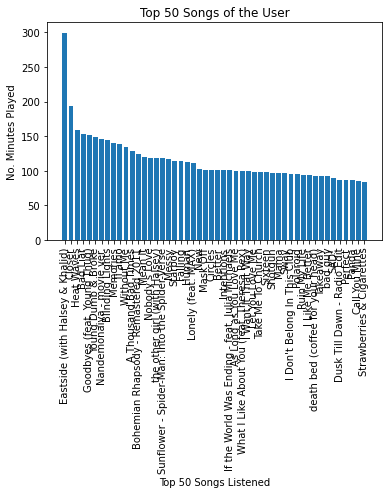

In [16]:
#Plotting Graphs for Track Based History
plt.title("Top 50 Songs of the User")
plt.xlabel("Top 50 Songs Listened")
plt.xticks(rotation=90)
plt.ylabel("No. Minutes Played")
plt.bar(top_50['trackName'],(top_50['secondsPlayed']/60))
plt.show()